## Multi Variables Linear Regression
In this notebook, I workout Gradient Descent algorithm for Multi Variable Linear Regression. No built-in models used. Using square error as cost function.

Numpy and Linear Algebra knowledge is extremely helpful. The code is much simpler and easier to understand.

In order to test and visualize result, we're using 2 variables though any number of variables should still work

In [1]:
# import
import pandas as pd
from pylab import *
import numpy as np

# 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# in order to test and visualize result, we're using 2 variables
X = np.array([[1, 1, 1], [1, 2, 3], [1, 3, 4], [1, 4, 5]])
Y = np.array([1, 2, 3, 4])
print('Training data:', '\n', X, '\n', 'y:', Y)

# setup global variables
theta = np.array([0, 0, 0], dtype='int64')

# adjust these to see effects
learning_rate = 0.001 # alpha
threshold = 0.001

# format output to show to 4 decimal places
np.set_printoptions(precision=4)

Training data: 
 [[1 1 1]
 [1 2 3]
 [1 3 4]
 [1 4 5]] 
 y: [1 2 3 4]


## Linear Hypothesis:
In the case of multi variables, we use following equation:
$$ h(x) = \theta_0{x_0} + {\theta_1}{x_1} + {\theta_2}{x_2} = \Theta^T X $$

## Sum Square Error:
Our goal is to minimize sum square error
$$ E(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h(x^{(i)}) - y^{(i)})^2 $$

In [3]:
# hypothesis
def h_x(theta, X):
    return np.dot(X, theta)

# sum square error
def cost_function(theta):
    error = (np.subtract(h_x(theta, X), Y)) ** 2
    return np.sum(error) * 1 / (2*len(theta))

# test
print('h(x):', h_x(theta, X))
print('Error:', cost_function(theta))

h(x): [0 0 0 0]
Error: 5.0


## Gradients
$$ \frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_1^m (h(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

In [4]:
def gradient(theta):    
    gradient = np.dot(h_x(theta, X) - Y, X)
    return gradient * 1 / len(theta)

# test
print('Gradient:', gradient(theta))

Gradient: [ -3.3333 -10.     -13.    ]


## Gradient Descent Algorithm
While not within threshold: (simultaneous update)
$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j} $$

In [5]:
# gradient descent
def linear_regression_multi_variables(theta):
    # keep going if error is not within threshold
    while cost_function(theta) > threshold:        
        theta = theta - learning_rate * gradient(theta)        
    return theta

theta = linear_regression_multi_variables(theta)
print('(theta:', theta, 'Error:', cost_function(theta))

(theta: [ 0.0123  0.8131  0.1401] Error: 0.000999942903151


In [6]:
# 3d scatter plot
def my_plot(data, c, m):
    for row in data:
        ax.scatter(row[0], row[1], row[2], zdir='z', c=c, marker=m) 
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')

Training data: 
 [[1 1 1]
 [2 3 2]
 [3 4 3]
 [4 5 4]]
Predicted data: 
 [[ 1.      1.      0.9655]
 [ 2.      3.      2.0588]
 [ 3.      4.      3.012 ]
 [ 4.      5.      3.9651]]


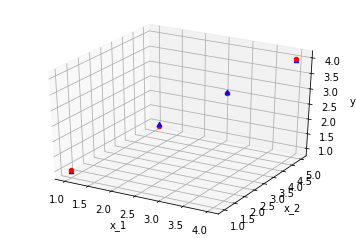

In [7]:
# initialize here once so we can draw both data on the same plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# we don't need to use bias terms for plots
X_nonbias = X[:, [1, 2]]

training_data = np.c_[X_nonbias, Y]
print('Training data:', '\n', training_data)
my_plot(training_data, 'r', 'o')

predicted_data = np.c_[X_nonbias, h_x(theta, X)]
print('Predicted data:', '\n', predicted_data)
my_plot(predicted_data, 'b', '^')

plt.show()